In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #This adjusts the configuration of the plots I will be creating

df = pd.read_csv(r'C:\Users\absae\Downloads\movies.csv\movies.csv')

In [15]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [8]:
# Looking to see if there is any missing data/null values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
#Looking at the count of all missing values per column

for col in df.columns:
    print(df[col].isnull().value_counts(),"\n")

False    7668
Name: name, dtype: int64 

False    7591
True       77
Name: rating, dtype: int64 

False    7668
Name: genre, dtype: int64 

False    7668
Name: year, dtype: int64 

False    7666
True        2
Name: released, dtype: int64 

False    7665
True        3
Name: score, dtype: int64 

False    7665
True        3
Name: votes, dtype: int64 

False    7668
Name: director, dtype: int64 

False    7665
True        3
Name: writer, dtype: int64 

False    7667
True        1
Name: star, dtype: int64 

False    7665
True        3
Name: country, dtype: int64 

False    5497
True     2171
Name: budget, dtype: int64 

False    7479
True      189
Name: gross, dtype: int64 

False    7651
True       17
Name: company, dtype: int64 

False    7664
True        4
Name: runtime, dtype: int64 



In [10]:
df_shape = df.shape
print(f'The dataset has {df.shape} rows and columns respectively')


The dataset has (7668, 15) rows and columns respectively


In [11]:
# Deleting all rows with missing values

df = df.dropna()
df.shape

(5421, 15)

In [12]:
# Looking at data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
# Changing data type in certain columns to make data easier to analyze

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [16]:
# Extracting the correct year between 'released' and 'year' columns

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [82]:
# Ordering the data by 'gross' revenue, and looking at all of the data

df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [28]:
# Checking to see if the dataset has any duplicates

df[(df.duplicated(keep = 'first'))]

# No Duplicates

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect


In [50]:
# Looking at summary statistics for numeric columns

print('Mean values:')
print(df[['yearcorrect', 'score', 'votes', 'budget', 'gross', 'runtime']].mean().astype(object))

print('\nMinimum values:')
print(df[['yearcorrect', 'score', 'votes', 'budget', 'gross', 'runtime']].min())

print('\nMaximum values:')
print(df[['yearcorrect', 'score', 'votes', 'budget', 'gross', 'runtime']].max().astype(object))

Mean values:
yearcorrect         2001.814794
score                  6.392455
votes             115066.129127
budget          36009170.470208
gross          103229653.333333
runtime              108.152739
dtype: object

Minimum values:
yearcorrect    1980.0
score             1.9
votes           195.0
budget         6000.0
gross           309.0
runtime          63.0
dtype: float64

Maximum values:
yearcorrect          2020.0
score                   9.3
votes             2400000.0
budget          356000000.0
gross          2847246203.0
runtime               271.0
dtype: object


In [77]:
# Looking at more summary statistics of the dataset

df.describe(include = ['O']).T

,count,unique,top,freq
name,5421,5336,Hercules,3
rating,5421,10,R,2597
genre,5421,15,Comedy,1496
released,5421,2560,"August 26, 2016 (United States)",7
director,5421,2063,Woody Allen,33
writer,5421,3205,Woody Allen,32
star,5421,1845,Nicolas Cage,40
country,5421,50,United States,4319
company,5421,1475,Universal Pictures,330


In [78]:
# Conclusions about summary statistics

# 1. The most frequent rating for a movie is R
# 2. The most frequent movie genre is Comedy
# 3. Director with the most movies is Woody Allen
# 4. Actor with the most movies is Nicolas Cage
# 5. United States releases the most movies
# 6. Company with the most relased movies is Universal Pictures

[Text(0.5, 1.0, 'Correlation Matrix')]

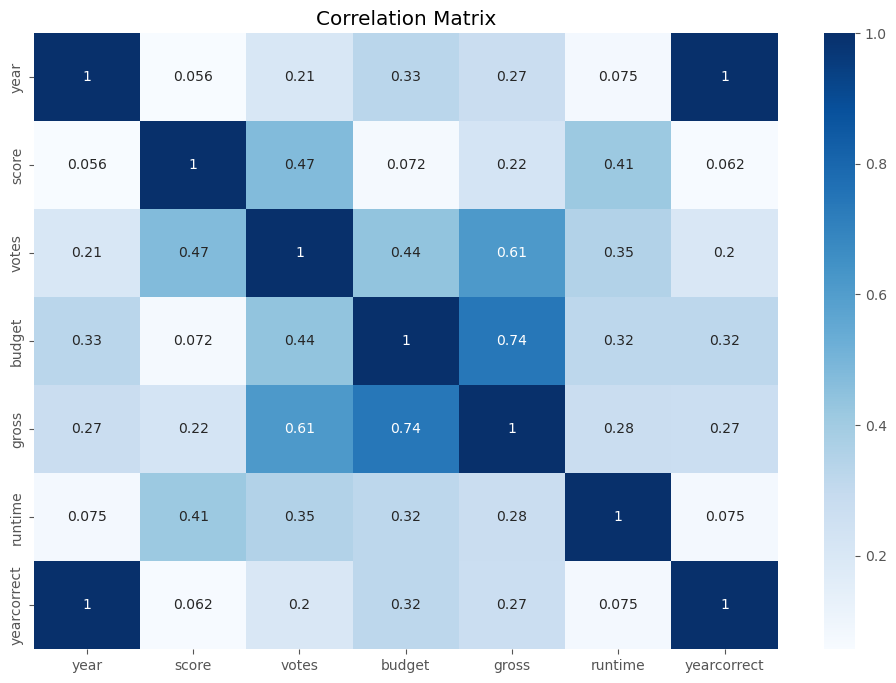

In [51]:
# Data Analysis - checking which variables have highest correlation wuth films' 'gross'

correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='Blues').set(title='Correlation Matrix')

In [61]:
# Another way to view the highest correlations between variables using unstacking

cormax = df.corr()
cormaxstack = cormax.unstack()
scmstack = cormaxstack.sort_values()
scmstack

year         score          0.056386
score        year           0.056386
yearcorrect  score          0.061923
score        yearcorrect    0.061923
             budget         0.072001
budget       score          0.072001
runtime      year           0.075077
year         runtime        0.075077
yearcorrect  runtime        0.075294
runtime      yearcorrect    0.075294
yearcorrect  votes          0.203098
votes        yearcorrect    0.203098
             year           0.206021
year         votes          0.206021
gross        score          0.222556
score        gross          0.222556
gross        yearcorrect    0.268721
yearcorrect  gross          0.268721
year         gross          0.274321
gross        year           0.274321
runtime      gross          0.275796
gross        runtime        0.275796
runtime      budget         0.318695
budget       runtime        0.318695
yearcorrect  budget         0.320312
budget       yearcorrect    0.320312
             year           0.327722
y

In [63]:
#Using unstacking to analyze the correlation among variables in another way

scmstack[((scmstack) > 0.5) & ((scmstack) < 1.0)].sort_values(ascending = False)


yearcorrect  year           0.998726
year         yearcorrect    0.998726
gross        budget         0.740247
budget       gross          0.740247
votes        gross          0.614751
gross        votes          0.614751
dtype: float64

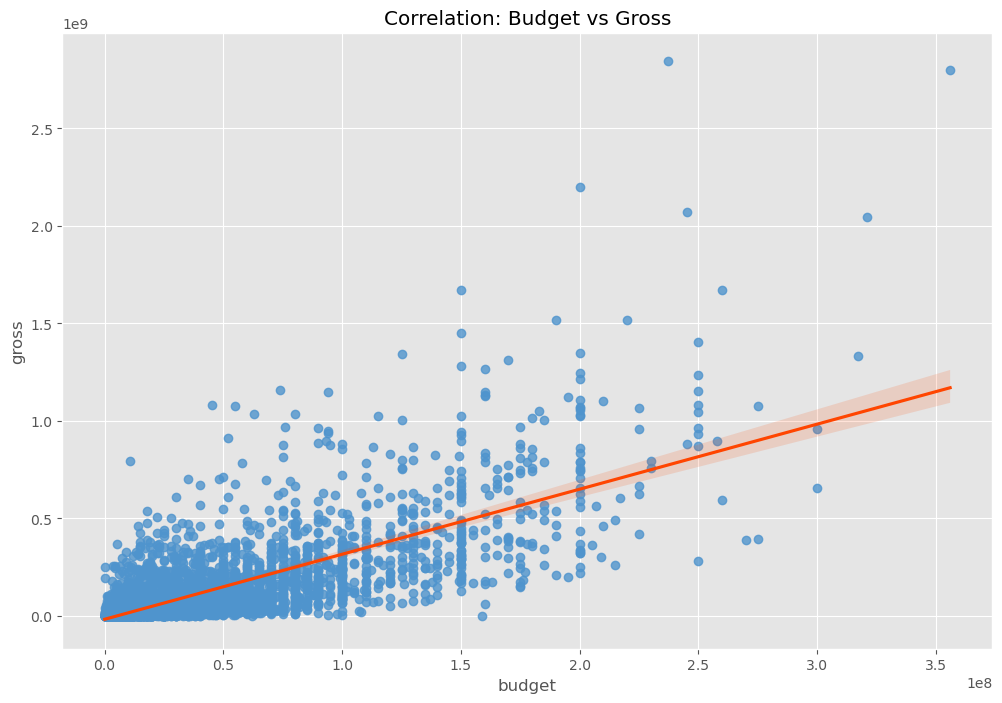

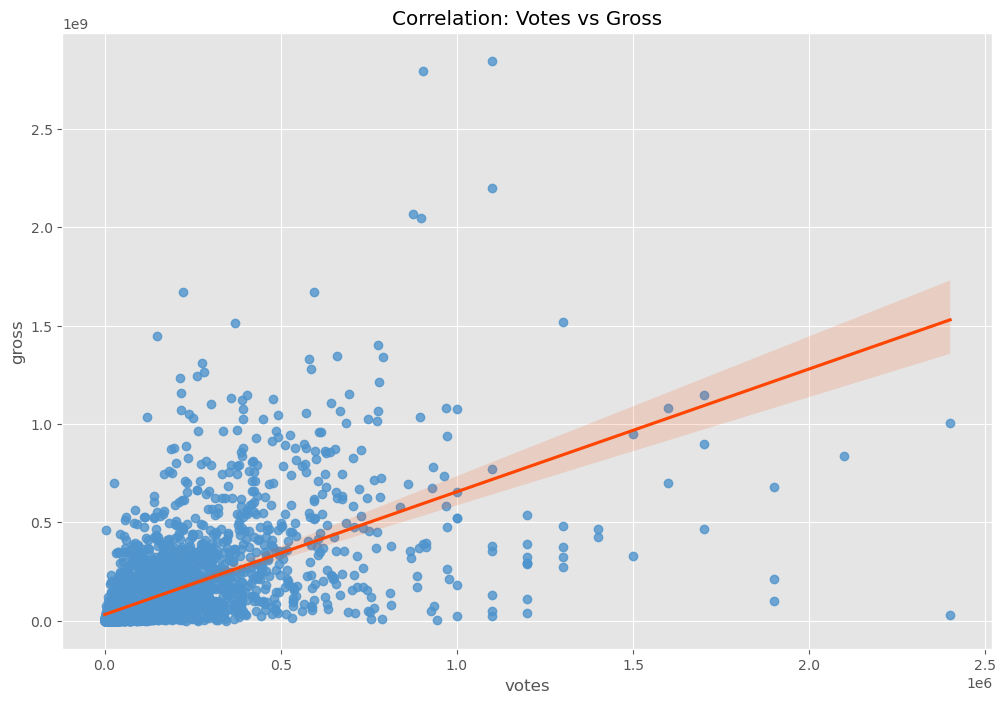

In [64]:
# Visualizing relationships between 'Budget vs Gross' and 'Votes vs Gross'

sns.regplot(data=df, x='budget', y='gross', scatter_kws={"color": "#4F94CD"}, line_kws={"color": "#FF4500"}).set(title='Correlation: Budget vs Gross')
plt.show()

sns.regplot(data=df, x='votes', y='gross', scatter_kws={"color": "#4F94CD"}, line_kws={"color": "#FF4500"}).set(title='Correlation: Votes vs Gross')
plt.show()

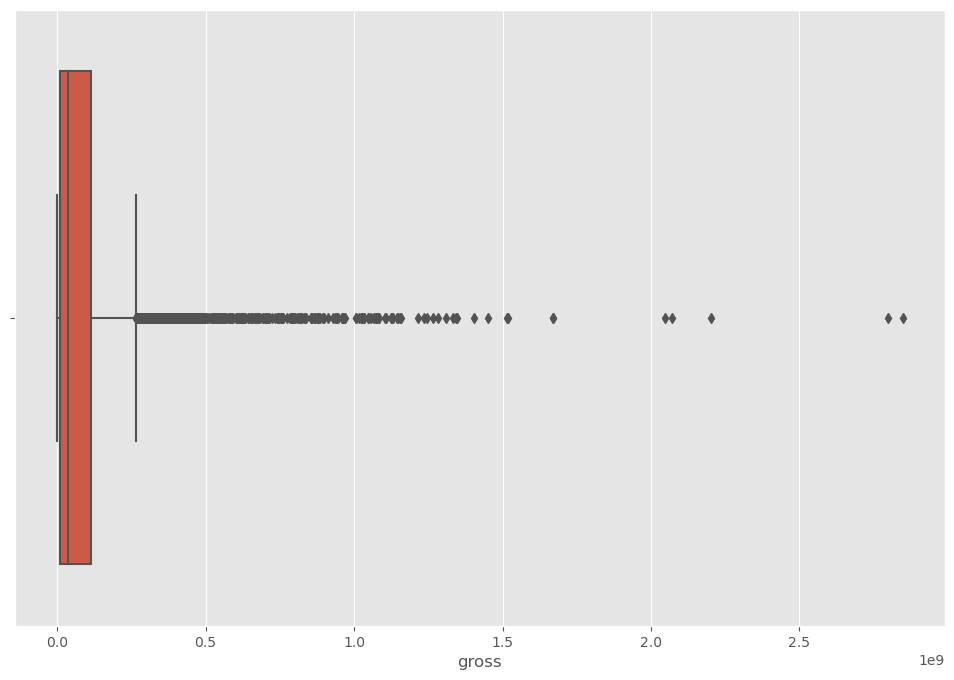

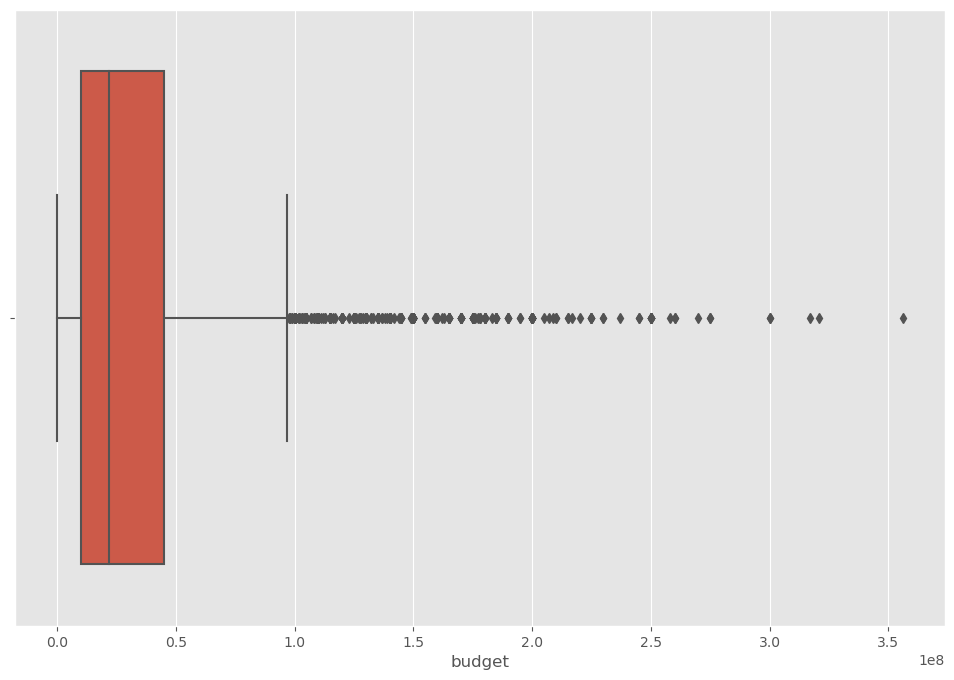

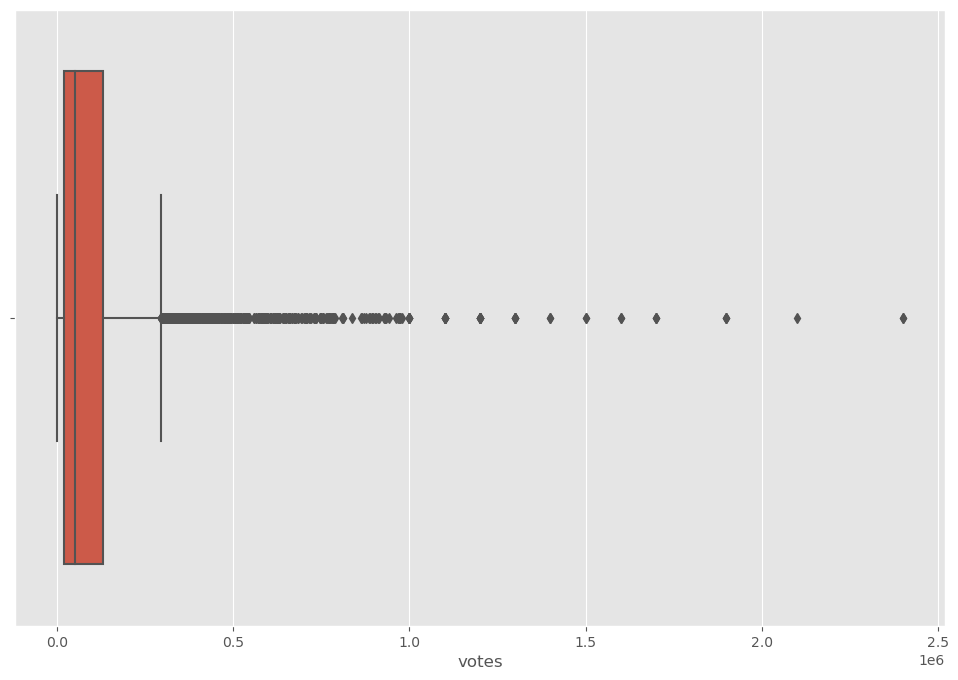

In [65]:
# Using boxplots to see outliers more clearly

sns.boxplot(x=df['gross'])
plt.show()
sns.boxplot(x=df["budget"])
plt.show()
sns.boxplot(x=df["votes"])
plt.show()

In [66]:
# Comparing the Top 10 Companies by 'budget' and 'gross'
# First, I am making a new dataframe for company's 'budget' and 'gross' sum and then sorting them

com = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)
com.head(10) 

# Next, I am resetting the index and only taking the Top 10 Companies

top10c = com.reset_index()
top10c = top10c.head(10)
top10c


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8552\2671068596.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  com = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)


,company,budget,gross
0,Warner Bros.,19503300000,54610959970
1,Universal Pictures,15989730001,51241105418
2,Columbia Pictures,15512107000,42356430218
3,Paramount Pictures,13723450000,40021704691
4,Twentieth Century Fox,11474600000,39542573303
5,Walt Disney Pictures,10404700000,35833650748
6,New Line Cinema,5645200000,19612851164
7,Marvel Studios,2664000000,15065592411
8,DreamWorks Animation,3344000000,11873612858
9,Dreamworks Pictures,3961700000,11593807697


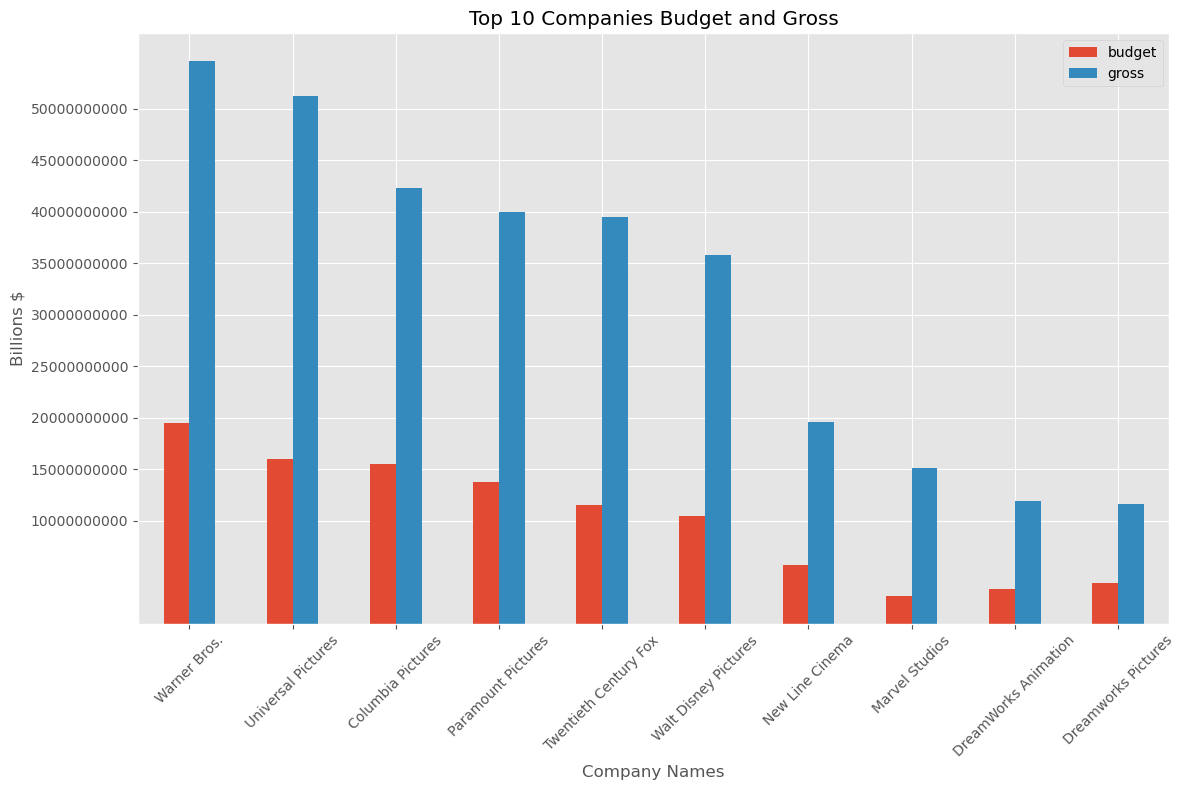

In [68]:
# Plotting the Top 10 Companies by 'Budget' and 'Gross'

ax = top10c.plot.bar(x ='company', rot = 0 )

# Title and Lables

plt.title('Top 10 Companies Budget and Gross')
plt.xlabel('Company Names')
plt.ylabel('Billions $')

# Refining the x-axis values to make them easier to analyze

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9], rotation = '45')

# Changing the values of the y-axis for easier readability

plt.yticks(range(10000000000, 55000000000, 5000000000))
vals = ax.get_yticks()

# Changing the format of y-axis values

ax.set_yticklabels(['{:.0f}'.format(x) for x in vals]) 

plt.tight_layout()
plt.show()

# The graph below shows the relationship between the 'Budget' and 'Gross' for each of the Top 10 Companies

In [69]:
# Looking at the Top 10 Companies with the most movie releases

# Making a new dataframe for the Top 10 Companies with the most movie releases

company = df['company'].value_counts()
company = pd.DataFrame(company) 
company = company.head(10) 
company

,company
Universal Pictures,330
Columbia Pictures,302
Warner Bros.,298
Paramount Pictures,279
Twentieth Century Fox,209
New Line Cinema,155
Walt Disney Pictures,107
Touchstone Pictures,105
Metro-Goldwyn-Mayer (MGM),99
Dreamworks Pictures,75


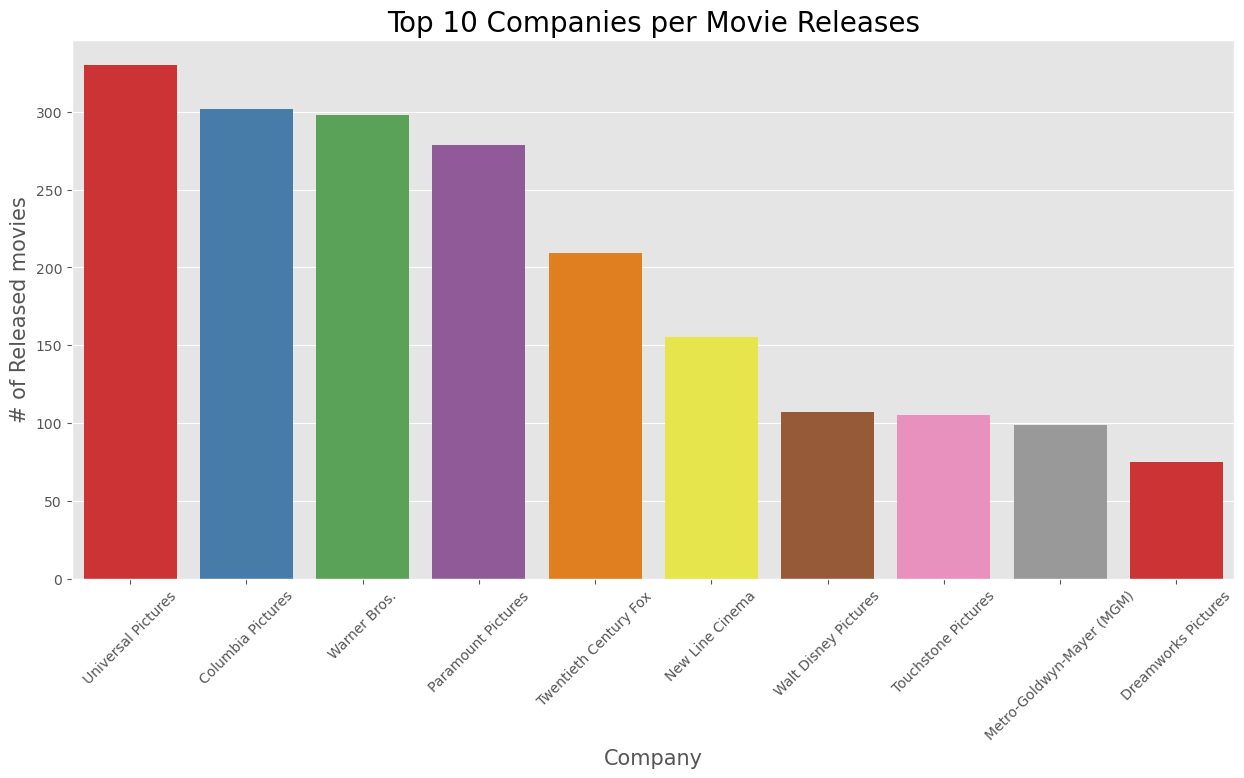

In [71]:
# Analyzing the Companies with the most releases

sns.barplot(x = company.index, y = company['company'] , palette="Set1")

# Titles and Labels

labels = company.index.tolist()
plt.gcf().set_size_inches(15, 7)
plt.title('Top 10 Companies per Movie Releases', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('# of Released movies', fontsize = 15)

# Refining the values for the x-axis to make it easier to analyze

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')

plt.show()

# Comparing the graph 'Top 10 Companies Budget and Gross' with 'Top 10 Companies per Movie Releases' 
# We see that 'Warner Bros.' has the highest total gross from its movies, but is 3rd in total movies released
# Thus, one can assume that 'Warner Bros.' makes more successfull movies compared to 'Universal Pictures' and 'Columbia Pictures'

In [72]:
# Now I want to analyze trends over time

# I will be analyzing the changes in 'budget', 'gross', and 'scores' between 1980-2020

# First, I will aggregate the data and group it by 'yearcorrect'

df_aggregated = df.groupby(df['yearcorrect']).agg({'budget': ['sum'], 'gross': ['sum'], 'score': ['mean'], 'name': ['count']})

df_aggregated.head() # Checking that the data was aggregated correctly

,budget,gross,score,name
,sum,sum,mean,count
yearcorrect,,,,
1980,354550000,1629441719,6.483333,36
1981,659050000,1704434042,6.279630,54
1982,871100000,2818579164,6.440845,71
1983,891424000,2322799554,6.131395,86
1984,1137255000,3059795115,6.386364,88


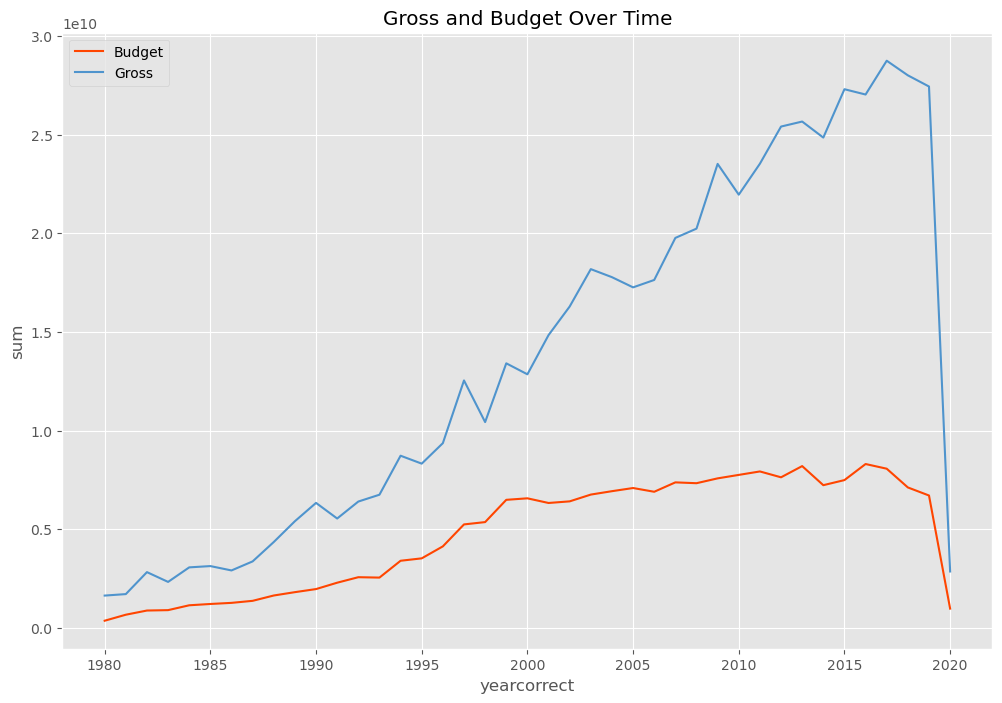

In [73]:
# Plotting time series data for total 'budget' and 'gross' per year 

sns.lineplot(data=df_aggregated, x='yearcorrect', y=df_aggregated['budget']['sum'], color='#FF4500')
sns.lineplot(data=df_aggregated, x='yearcorrect', y=df_aggregated['gross']['sum'], color="#4F94CD")
plt.title('Gross and Budget Over Time')
plt.legend(labels=["Budget","Gross"])
plt.show()

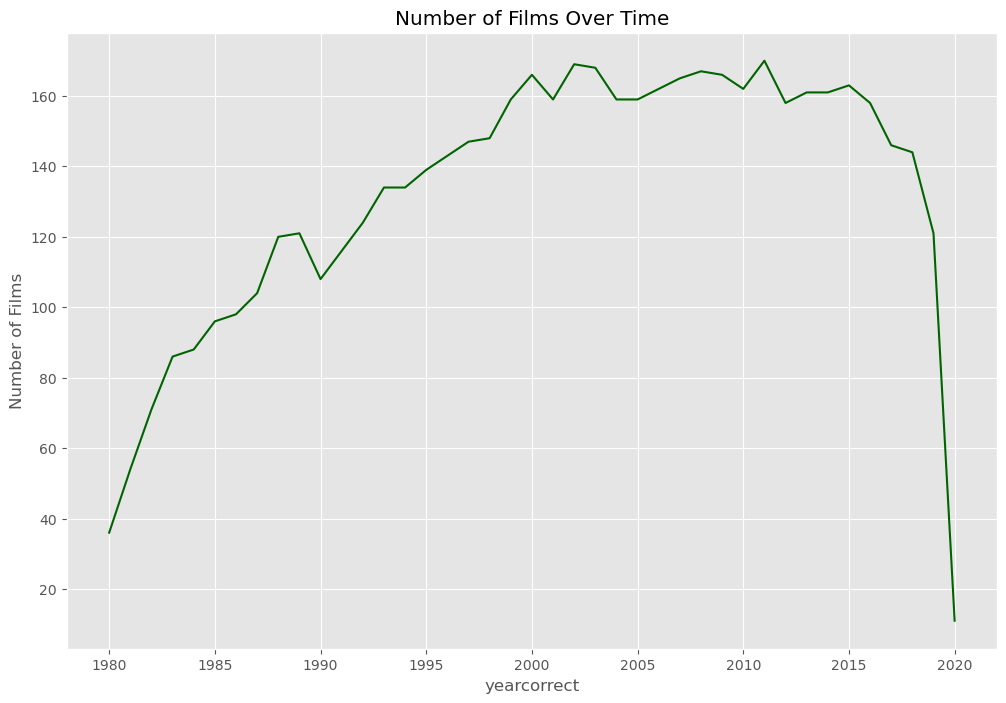

In [76]:
# The graph above shows consistent growth, except for a sharp decline for both 'budget' and 'gross' in 2020
# To understand why, let's look at the total # of films released each year

sns.lineplot(data=df_aggregated, x='yearcorrect', y=df_aggregated['name']['count'], color='#006400')
plt.ylabel('Number of Films')
plt.title('Number of Films Over Time')
plt.show()

# The graph belows shows that there was in fact a decline of movies made in 2020, most likely due in part of the Covid-19 pandemic and restraints on movie attendance 

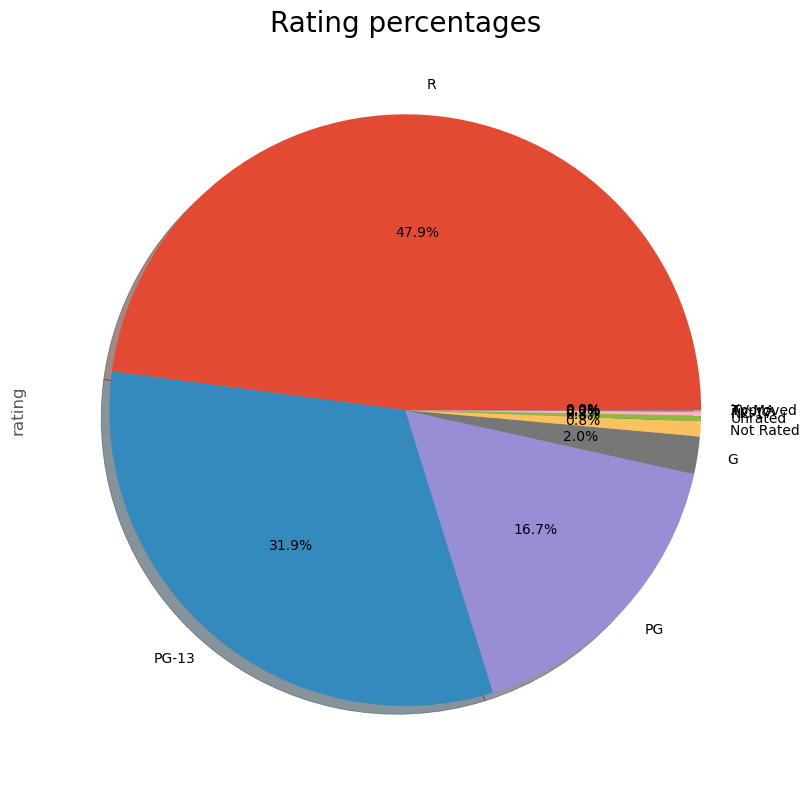

In [79]:
# Now I want to examine to comparisons in the Ratings of each movie and the Genres of each movie

# I will be plotting the Rating comparison as percentages

df['rating'].value_counts().plot.pie(autopct = '%1.1f%%',shadow = True,figsize = (12,8))

plt.title('Rating percentages', fontsize = 20)
plt.tight_layout()
plt.show()

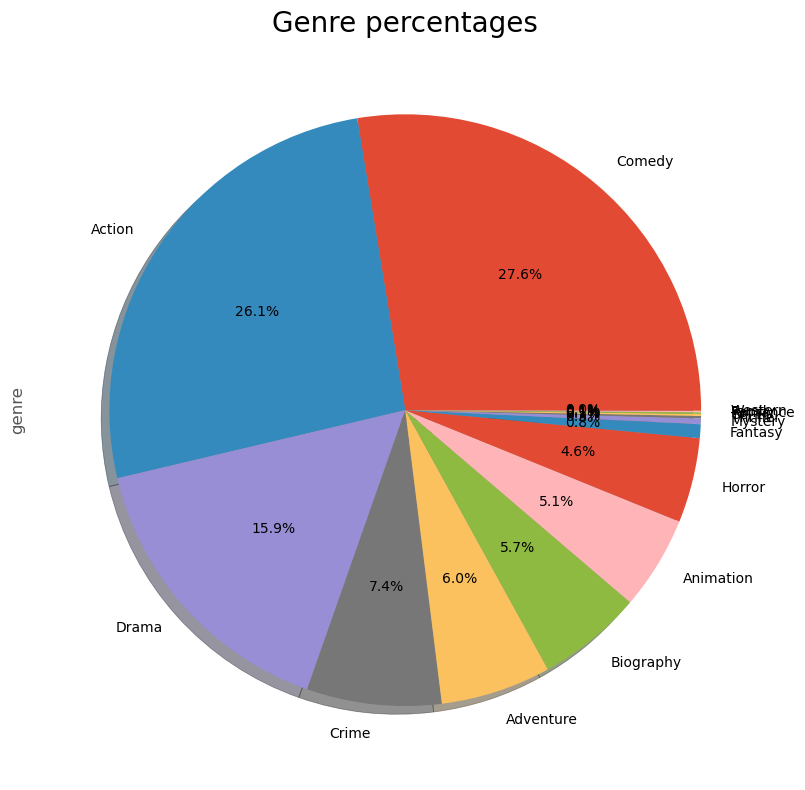

In [80]:
# Plotting the Genre Comparison as percentages

df['genre'].value_counts().plot.pie(autopct = '%1.1f%%',shadow = True,figsize = (12,8))

plt.title('Genre percentages', fontsize = 20)
plt.tight_layout()
plt.show()

In [81]:
# Conclusions about Correlations between variables
     # 1. Budget has the highest correlation to gross earnings
     # 2. Votes have the 2nd highest correlation to gross earnings

# Conclusions about Summary Statistics of the data
     # 1. The most frequent rating for a movie is R
     # 2. The most frequent movie genre is Comedy
     # 3. Director with the most movies is Woody Allen
     # 4. Actor with the most movies is Nicolas Cage
     # 5. United States releases the most movies
     # 6. Company with the most relased movies is Universal Pictures
     # 7. Company with the highest total gross of all its movies is 'Warner Bros.'

# Comparing the graph 'Top 10 Companies Budget and Gross' with 'Top 10 Companies per Movie Releases' 
     # 1. 'Warner Bros.' has the highest total gross from its movies, but is 3rd in total movies released
     # 2. Thus, one can assume that 'Warner Bros.' makes more successfull movies compared to 'Universal Pictures' and 'Columbia Pictures'

# Comparing graphs 'Gross and Budget Over Time' vs 'Number of Films Over Time'
     # 1. Both graphs show consistent growth, except for a sharp decline for both 'budget' and 'gross' in 2020
     # 2. There was in fact a decline of movies made in 2020, most likely due in part of the Covid-19 pandemic and restraints on movie attendance